# Análisis exploratorio de datos
En primer lugar, es fundamental comprender cómo se distribuyen y organizan los datos. Por ello, hagamos una primera aproximación:

In [22]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from src.MLDS6_Assets.preprocessing import countFilesinFolder, getFileExtensions, analyzeImageShapes, analyzeImageChannels, getFolderSize
from src.MLDS6_Assets.visualization import plotDataPartition

Vamos a contar los archivos en todo el dataset. De acuerdo a la fuente, se tienen 5856 imagenes

In [23]:
n = countFilesinFolder("../data")
print(f'El dataset contiene {n} archivos')

El dataset contiene 5856 archivos


Podemos ver cuanto representa el conjunto de datos completos en memoria

In [24]:
size = getFolderSize("../data")
print(f'El dataset representa {size:.3f}GB en memoria')

El dataset representa 1.152GB en memoria


Con este resultado, nos interesa averiguar que son dichos archivos. ¿Son solo imagenes? ¿Existe alguna metadata adicional?

In [25]:
extensions = getFileExtensions('../data')
print(f'Los archivos del dataset tienen extensiones: {extensions}')

Los archivos del dataset tienen extensiones: {'.jpeg'}


Dado que todos los archivos son imagenes, vamos a ver si sus dimensiones están estandarizadas o no. En el caso de imagenes, verificaremos sus dimensiones y cuantos caanales de color disponen

In [26]:
shapesSummary = analyzeImageShapes('../data')
print(shapesSummary)

Number of different shapes: 4803
Shape with most pixels: (2916, 2583) (Total pixels: 7532028)
Shape with least pixels: (384, 127) (Total pixels: 48768)


In [27]:
colorsSummary = analyzeImageChannels('../data')
print(colorsSummary)

Number of grayscale images (1 channel): 5573
Number of RGB images (3 channels): 283
Number of images with other channel configurations: 0


Es evidente que los datos requeriran de un proceso de normalización para poder disponerse para un modelo.

### Calidad de la partición provista

Dado que el dataset ya da una particion de los datos, se realizará el respectivo conteo y análisis de cada uno de estos para concluir si serán de utilidad o no en el proceso de entrenamiento, pruebas y validación.

In [28]:
dirs = [
  '../data/train/bacterialPneumonia',
  '../data/train/virusPneumonia',
  '../data/train/Normal',
  '../data/test/bacterialPneumonia',
  '../data/test/virusPneumonia',
  '../data/test/Normal',
  '../data/val/bacterialPneumonia',
  '../data/val/virusPneumonia',
  '../data/val/Normal',
]

s = {}
for dir in dirs:
  keys = dir.split('/')[2:]
  if keys[0] not in s: s[keys[0]] = {}
  if keys[1] not in s[keys[0]]: s[keys[0]][keys[1]] = countFilesinFolder(dir)

#### Partición de entrenamiento

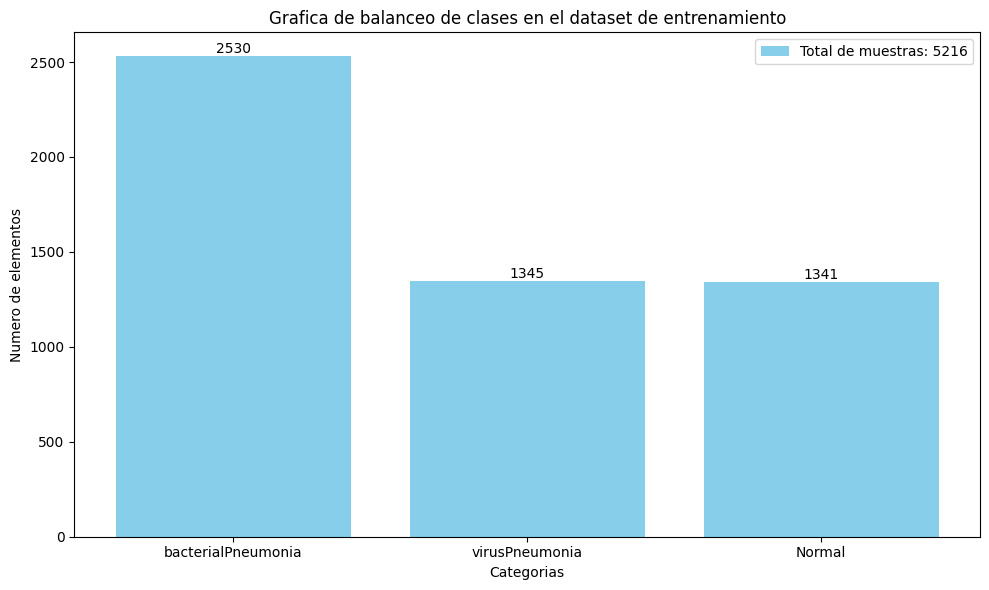

In [29]:
plotDataPartition(s['train'], 'Grafica de balanceo de clases en el dataset de entrenamiento')

#### Partición de prueba

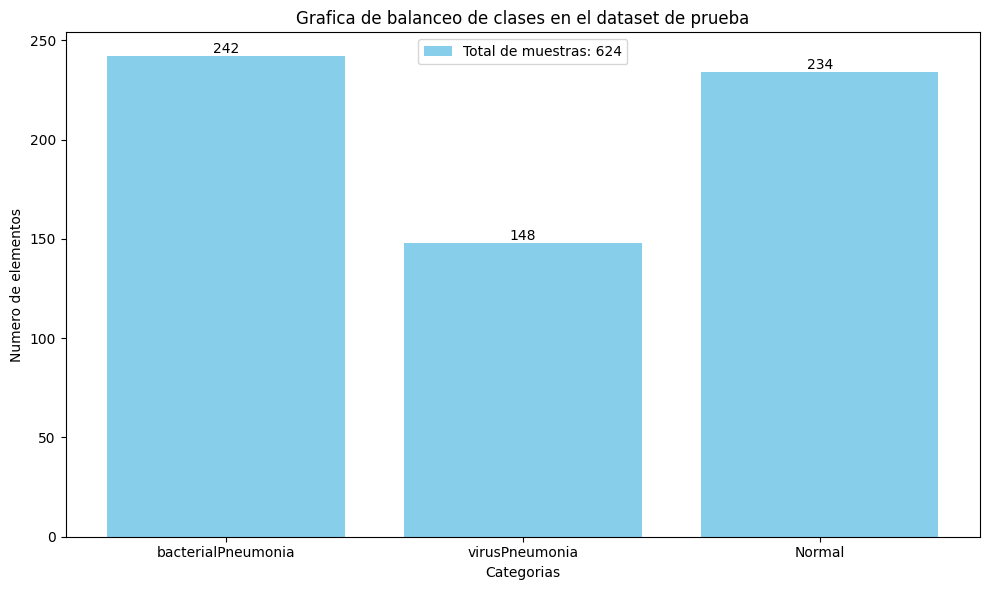

In [30]:
plotDataPartition(s['test'], 'Grafica de balanceo de clases en el dataset de prueba')

#### Partición de validación

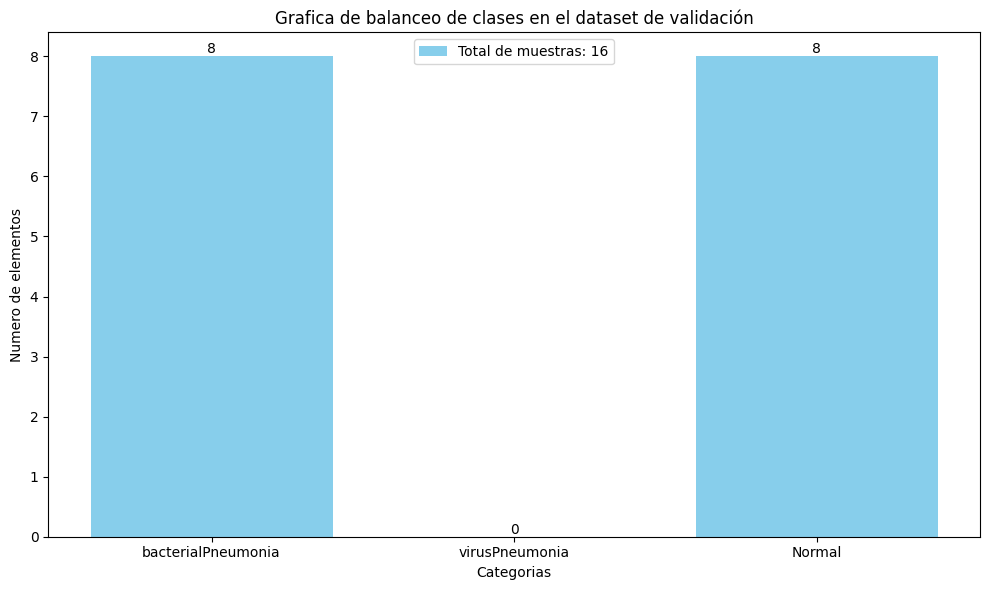

In [31]:
plotDataPartition(s['val'], 'Grafica de balanceo de clases en el dataset de validación')

#### Dataset Completo

Finalmente, vamos a visualizar la distribución de etiquetas para el conjunto de datos completo (Es decir, uniendo las tres particiones)

In [32]:
newS = {}
for d in s:
    for p in s[d]:
        if p not in newS: newS[p] = s[d][p]
        else: newS[p] += s[d][p]

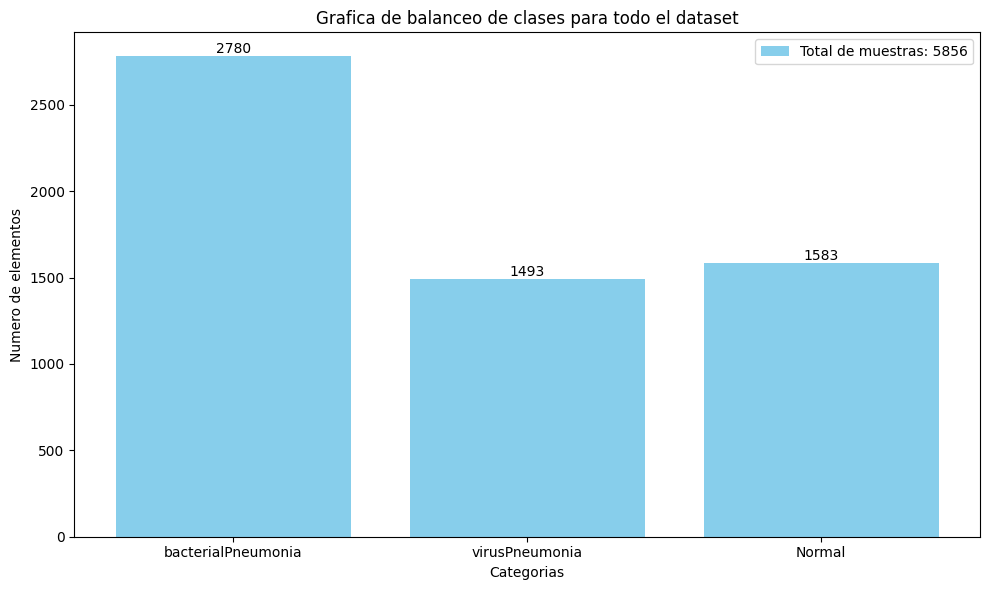

In [33]:
plotDataPartition(newS, 'Grafica de balanceo de clases para todo el dataset')

Es evidente que el conjunto de datos está desbalanceado

# Conclusiones


El dataset presenta un total de 5856 archivos correspondientes a imágenes de radiografías de rayos x de pecho.

Así mismo, las imágenes se encuentran distribuidas de la siguiente forma.



1.   Directorio de Entrenamiento: 5216 imágenes


*   1341 imágenes clasificadas con la etiqueta NORMAL
*   3875 imágenes clasificadas con la etiqueta PNEUMONIA


2.   Directorio de Prueba: 624 imágenes


*   234 imágenes clasificadas con la etiqueta NORMAL
*   390 imágenes clasificadas con la etiqueta PNEUMONIA

3.  Directorio de validación: 16 imágenes


*   8 imágenes clasificadas con la etiqueta NORMAL
*   8 imágenes clasificadas con la etiqueta PNEUOMINIA


Las imágenes se encuentran almacenadas en formato JPG para un total de 1.15 GB de memoria en almacenamiento asignado a la totalidad del conjunto de datos.


### Calidad de los datos

Afortunadamente, la calidad de los datos se mantiene intacta y presenta las siguientes características:
1. El tamaño del dataset es adecuado para el análisis y entrenamiento de modelos de aprendizaje automático. Una cantidad suficiente de imágenes permite crear modelos robustos y capaces de identificar patrones de manera eficiente.
2. No hay datos faltantes ni imágenes vacías o de mala calidad. El dataset ha sido previamente procesado y organizado, lo que asegura que todas las imágenes estén en buen estado y listas para su análisis.
3. No se detectaron documentos ilegibles ni problemas de codificación. Debido a que el dataset proviene de una fuente confiable en Kaggle, ha pasado por un proceso de limpieza y validación, garantizando la correcta codificación de todos los archivos.
4. No se observa ningún sesgo evidente en el dataset. No obstante, es importante aclarar que los conjuntos de test y validacion estan mal distribuidos, por lo cual, se realizara el balanceo mas adelante.
4. No existe mezcla de formatos. Todas las imágenes están uniformemente en formato JPEG, lo cual facilita su manejo y procesamiento. Este tipo de consistencia es típica en datasets curados como los que se encuentran en Kaggle, donde ya se ha asegurado que los datos sean uniformes y listos para ser utilizados en proyectos de aprendizaje automático o análisis de imágenes.


### Análisis de variables y etiquetas

##### 1. Variable objetivo
El dataset tiene una variable categórica para clasificar imágenes de rayos X en tres clases: 
- **NORMAL**: Sin neumonía
- **VIRUS**: Neumonía viral
- **BACTERIA**: Neumonía bacteriana

##### 2. Relación entre variables
El análisis de correlación tradicional no se aplica, ya que el problema involucra una variable categórica. Las relaciones relevantes se encuentran en las características visuales, como texturas y patrones. **VIRUS** y **BACTERIA** pueden compartir patrones visuales similares, ya que ambas son neumonías.

##### 3. Distribución de etiquetas y balance de datos
El dataset está organizado en plataformas confiables, pero es importante verificar la distribución de las clases **NORMAL**, **VIRUS** y **BACTERIA**. Se evidencio un desbalanceo considerable en las particiones dde datos, lo cual requeriría técnicas de balanceo, como **sobremuestreo** o **submuestreo**.

##### 4. Variables adicionales
El dataset solo contiene imágenes organizadas en directorios según su categoría, pero se pueden extraer características adicionales, como texturas y patrones, utilizando técnicas de procesamiento de imágenes y modelos de aprendizaje profundo, como redes neuronales convolucionales (CNN), para mejorar el rendimiento del modelo.
